In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/gdrive/My Drive/Colab Notebooks/shape_predictor_68_face_landmarks.dat')
# Path to a single example video
video_path = '/content/gdrive/My Drive/Colab Notebooks/dataset/Adriano/VID_20240425_123033_FLAG.mp4'

ret is ok!


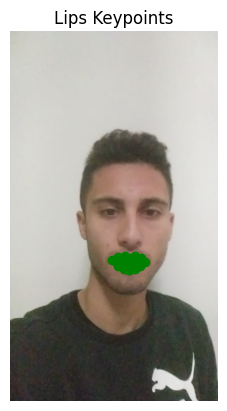

In [30]:
# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()
if ret:
    print("ret is ok!")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        lips_points = []
        for i in range(48, 68):  # Points corresponding to the lips
            x = landmarks.part(i).x
            y = landmarks.part(i).y
            lips_points.append((x, y))
        lips_points = np.array(lips_points)

        # Plot the frame with keypoints
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.scatter(lips_points[:, 0], lips_points[:, 1], c='green', marker='o')
        plt.title("Lips Keypoints")
        plt.axis('off')
        plt.show()

cap.release()

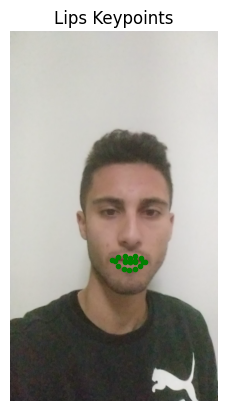

In [35]:
# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()
if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect face region using dlib's face detector
    faces = detector(gray)
    if len(faces) > 0:
        face = faces[0]  # Assume the first detection is relevant

        # Detect landmarks for the face
        landmarks = predictor(gray, face)

        # Extract the mouth region coordinates based on lip landmarks
        mouth_x_min = min(landmarks.part(i).x for i in range(48, 68))
        mouth_x_max = max(landmarks.part(i).x for i in range(48, 68))
        mouth_y_min = min(landmarks.part(i).y for i in range(48, 68))
        mouth_y_max = max(landmarks.part(i).y for i in range(48, 68))

        # Crop mouth region with a small margin
        margin_x = int((mouth_x_max - mouth_x_min) * 0.1)
        margin_y = int((mouth_y_max - mouth_y_min) * 0.1)

        mouth_crop = frame[max(0, mouth_y_min - margin_y):min(frame.shape[0], mouth_y_max + margin_y),
                           max(0, mouth_x_min - margin_x):min(frame.shape[1], mouth_x_max + margin_x)]

        # Plot the original frame with lip keypoints
        lips_points = np.array([(landmarks.part(i).x, landmarks.part(i).y) for i in range(48, 68)])
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.scatter(lips_points[:, 0], lips_points[:, 1], c='green', marker='.')
        plt.title("Lips Keypoints")
        plt.axis('off')
        plt.show()

cap.release()


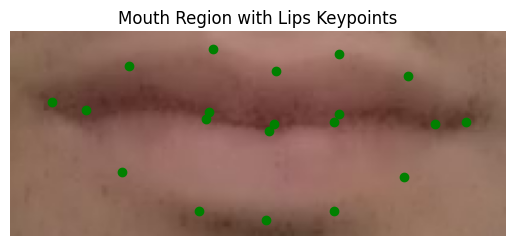

In [37]:
# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, frame = cap.read()
if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect face region using dlib's face detector
    faces = detector(gray)
    if len(faces) > 0:
        face = faces[0]  # Assume the first detection is relevant

        # Detect landmarks for the face
        landmarks = predictor(gray, face)

        # Extract the mouth region coordinates based on lip landmarks
        mouth_x_min = min(landmarks.part(i).x for i in range(48, 68))
        mouth_x_max = max(landmarks.part(i).x for i in range(48, 68))
        mouth_y_min = min(landmarks.part(i).y for i in range(48, 68))
        mouth_y_max = max(landmarks.part(i).y for i in range(48, 68))

        # Crop mouth region with a small margin
        margin_x = int((mouth_x_max - mouth_x_min) * 0.1)
        margin_y = int((mouth_y_max - mouth_y_min) * 0.1)

        mouth_crop = frame[max(0, mouth_y_min - margin_y):min(frame.shape[0], mouth_y_max + margin_y),
                           max(0, mouth_x_min - margin_x):min(frame.shape[1], mouth_x_max + margin_x)]

        # Plot the cropped mouth region with lip keypoints relative to the crop
        cropped_lips_points = np.array([(
            landmarks.part(i).x - max(0, mouth_x_min - margin_x),
            landmarks.part(i).y - max(0, mouth_y_min - margin_y)
        ) for i in range(48, 68)])

        plt.imshow(cv2.cvtColor(mouth_crop, cv2.COLOR_BGR2RGB))
        plt.scatter(cropped_lips_points[:, 0], cropped_lips_points[:, 1], c='green', marker='o')
        plt.title("Mouth Region with Lips Keypoints")
        plt.axis('off')
        plt.show()

cap.release()
